<a href="https://colab.research.google.com/github/angelmorenocalvo/taller_TensorFlow/blob/master/celsius_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celsius

En este ejemplo vas ha entrenar tu primer modelo de machine learning.

Para empezar usaremos un ejemplo sencillo, este sera el de convertir de grados Celsius a Fahrenheit:

$f=c*1.8+32$

Si quisiesemos sería muy sencillo el hacer una función en python que hiciese esta tarea, pero esto no seria machine learning :|

Vamos a darle a Tensorflow algunos ejemplos de valore de celsius (0,8,15,22,38) y los correspondientes valores de Fahrenheit (32,46,59,72,100). Despues entrenameros el modelo que debería conseguir la formula de arriba.

## Importar las dependencias
Primero, importaremos TensorFlow. Lo llamaresm **tf** para que sea un uso más facil.
Despues importaremos numpy que nos ayudara a representar nuestros datos como listas con más rendimiento.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

## Preparando los datos de entrenamiento

Como sabemos el Machine Learning supervisado cuenta con inputs y outputs conocidos, pero no se conoce el algoritmo.

Crearemos dos listas(celsius_q y fahrenheit_a) las que usaremos para entrenar el modelo

In [16]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

# Imprimimos los datos para verlos por parejas
for i,c in enumerate(celsius_q):
  print("{} grados Celsius = {} grados Fahrenheit".format(c, fahrenheit_a[i]))


-40.0 grados Celsius = -40.0 grados Fahrenheit
-10.0 grados Celsius = 14.0 grados Fahrenheit
0.0 grados Celsius = 32.0 grados Fahrenheit
8.0 grados Celsius = 46.0 grados Fahrenheit
15.0 grados Celsius = 59.0 grados Fahrenheit
22.0 grados Celsius = 72.0 grados Fahrenheit
38.0 grados Celsius = 100.0 grados Fahrenheit


## Algunas terminologías del Machine Learning

- **Feature** $\rightarrow$ el input de nuestro modelo, en este caso los grados Celsius

- **Labels** $\rightarrow$ El output de las predicciones de nuestro modelo, en este caso un unico valor, los grados Fahrenheit.

- **Example** $\rightarrow$ parejas de inputs/outputs que usamos durante nuestro entrenamiento. En nuestro caso una pareja de *celsius_q* y *fahrenheit_a* de un indice dado, ejemplo: (22,72).

## Creando el modelo
Ahora pasaremos a crear el modelo. Usaremos el modelo mas simple posible, La red densa.
Dado que el problema es sencillo, esta red requerirá una unica capa con una sola neurona.

### Creacion de una capa
Llamaremos capa `l0` a la capa que utilizaremos, y se instanciará a traves de `tf.keras.layers.Dense`con la siguiente configuración:
- `input_shape=[1]` $\rightarrow$ esto especifica que el input de esta capa es un unico valor. La forma(shape) es un array de una dimensión con un elemento.ya que es la primera(y unica) capa, esta forma de entrada del modelo entero. El unico valor es un número de punto flotante representando los grados Celsius.

- `units=1` $\rightarrow$  este especifica el numero de neuronas en la capa. El número de neuronas define cuantas variables internas  la capa contiene para aprender a solucionar el problema.
Como esta es la capa final es tambien el tamaño de output del modelo, un solo valor flotante representado en grados Fahrenheit.
(En una red multicapa el tamaño del shape  de la capa debe coincidir con con el `input_shape` de la siguiente capa.)



In [0]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

## Montar las capas en el modelo

Una vez las capas son definidas estas deben montarse en en el modelo. El modelo secuencial se define a traves de una lista con las capas como argumentos, especificando el orden de input a output.

Este modelo tiene una unica capa:

In [0]:
model = tf.keras.Sequential([l0])

**Se puede crear las capas al mismo tiempo que se meten en el modelo:**

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

## Compilar el modelo con las funciones de perdida y optimización.

Antes de entrenar el modelo debe ser compilado. Cuando se compila un modelo se le tiene que dar:
- Loss funtion $\rightarrow$  una forma para medir que tan lejos están las predicciones del resultado real
- Función de optimización $\rightarrow$ Forma de ajustar los valores internos a traves de los resultados de la función de perdida.

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

La funcion (mean squared error) y el optimizador(Adam) es un estanadar para modelos simples como este. No es importante conocer como funcionan estas funciones para utilizarlas :)

Para el optimizador se le debe dar un valor, que es muy importante, el learning rate( en este caso 0.1) que sera la velocidad a la que nuestro modelo aprendera, un learning rate(los pasos que hace) alto provocará que la función pueda no llegar a minimizarse, mientras que un learning rate bajo puede hacer que tarde mucho tiempo en llegar al objetivo.

Se suelen utilizar rangos de learning rate entre 0.001 y 0.1

## Entrenando el modelo
Entrenaremos el modelo llamando al metodo `fit`.

Durante el entrenamiento, el modelo toma los valores en Celsius, realizando el calculo usando los valores internos de las variables(llamados pesos) y los valores de salida(grados Fahrenheit).

Los valores internos de los pesos son calculados aleatóriamente la primera vez, y en las siguientes se va variando el peso a traves de la función de loss y el optimizador directamente en como los pesos deben ser ajustados.

El ciclo de calcular, comparar es controlado por el metodo `fit`. Argumentos:
1. Inputs.
2. Outputs.
3. `epoch` las veces que se repetira el ciclo.
4. `verbose` la coantidad de argumentos de control que sacara por pantalla el proceso.

In [20]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("entrenamiento terminado")


entrenamiento terminado


## Mostrando los estadísticos
El metodo `fit` retorna un objeto histórico Podemos usar este objeto para trazar como la funcion de perdidas de nuestro modelo ha ido bajando a lo largo del entrenamiento. Una perdida grande implica qeu las predicciones están lejos del valor a obtener.

Usaremos la libreria Matplotlib para visualizarlo.

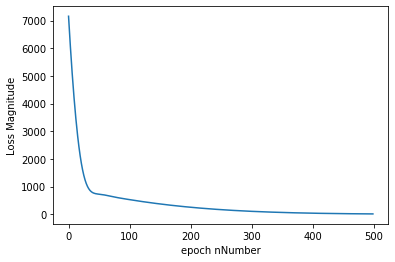

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('epoch nNumber')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usar el modelo para predecir valores

Ahora que ya temenos el modelo entrenado podemos usar la predicción para calcular los grados Fahrenheit a traces de los grados Celsius.

Provaremos con 100 grados Celsius.

In [22]:
print(model.predict([100.0]))

[[211.28406]]


La respuesta correcta es $100*1.8+32 = 212$ por lo que nuestro modelo lo está haciendo bastante bien.

## Veamos los pesos
Vamos a imprimir los valores internos de la capa densa.

In [23]:
print("estas son las variables de la capa densa: {}".format(l0.get_weights()))

estas son las variables de la capa densa: [array([[-0.53457725]], dtype=float32), array([0.], dtype=float32)]


La primera variable esta cerca de 1.8 y la segunda cerca de 32.

Se encuentran muy cerca de los valores de la formula. 

Como se puede ver una unica neurona con una única entrada y una unica salida se muestra igual que la ecuación lineal, $y = mx + b$ que tiene la misma forma que la ecuación buscada $f = 1.8c + 32$.
 

## Vamos a jugar
creemos una red con mas capas y neuronas.
¿Como se comportará?

In [28]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(units=4, input_shape=[1]),
                              tf.keras.layers.Dense(units=4),
                              tf.keras.layers.Dense(units=1)
])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model2.fit(celsius_q,fahrenheit_a, epochs=500, verbose=False)
print("Modelo entrenado, vamos ha hacer la predicción de 100.0")
print(model2.predict([100.0]))

Modelo entrenado, vamos ha hacer la predicción de 100.0
[[211.74747]]


In [35]:
print("pesos de la primera capa{}".format(model2.layers[0].get_weights()))
print("pesos de la segunda capa{}".format(model2.layers[1].get_weights()))
print("pesos de la tercera capa{}".format(model2.layers[2].get_weights()))

pesos de la primera capa[array([[ 0.6734086 , -0.30854803,  0.01657695,  0.20667386]],
      dtype=float32), array([ 2.8815815,  1.6237755, -2.5138977,  2.2809904], dtype=float32)]
pesos de la segunda capa[array([[ 0.52891856, -0.87287414, -1.1995385 , -0.28883666],
       [ 0.18473616,  0.08692178, -0.7739378 , -0.0216382 ],
       [-0.6325628 , -0.10597235,  0.2539062 ,  0.893905  ],
       [ 0.7804966 ,  0.29433006, -0.51371026, -0.1113373 ]],
      dtype=float32), array([ 2.8283384, -2.261159 , -2.8340728, -2.8229747], dtype=float32)]
pesos de la tercera capa[array([[ 1.0148757 ],
       [-0.34091124],
       [-1.4037302 ],
       [-1.0715073 ]], dtype=float32), array([2.7801483], dtype=float32)]
